Optimal sites for 5G deployment:
    Site_ID  RRC Connected User_Opt2  DL PRB Utilization_ENG(%)  \
0    151002               550.109987                  96.239900   
1    151003               947.099832                  73.903935   
4    151006               646.425839                  95.160839   
7    151009               950.414703                  82.868755   
12   151037               580.120277                  95.956048   
17   151059               879.754181                  96.626829   
20   151082               753.076019                  95.702032   
23   151091               518.124700                  91.402477   
24   151092               547.064800                  94.459258   
27   151096              1239.811097                  95.636416   
29   151100               753.014368                  94.925977   
37   151234               526.263755                  97.181694   
40   151419              1400.712606                  93.431723   
45   151532               705

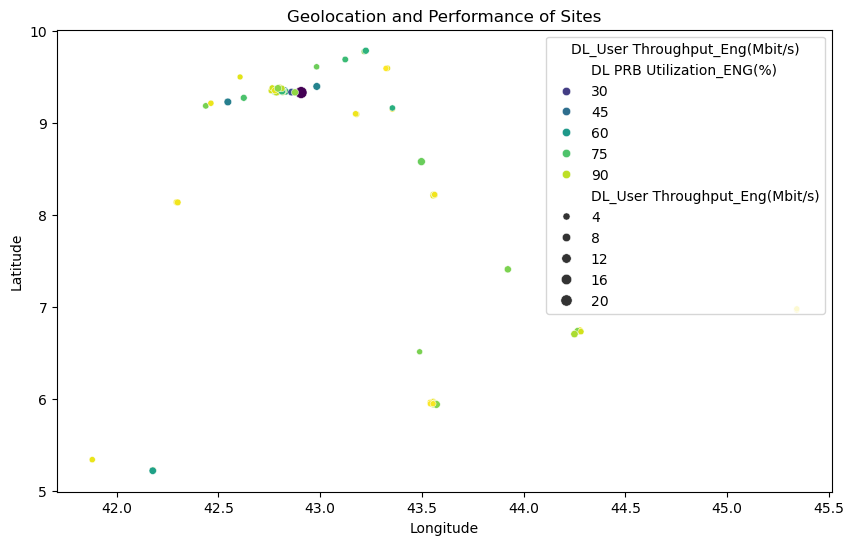

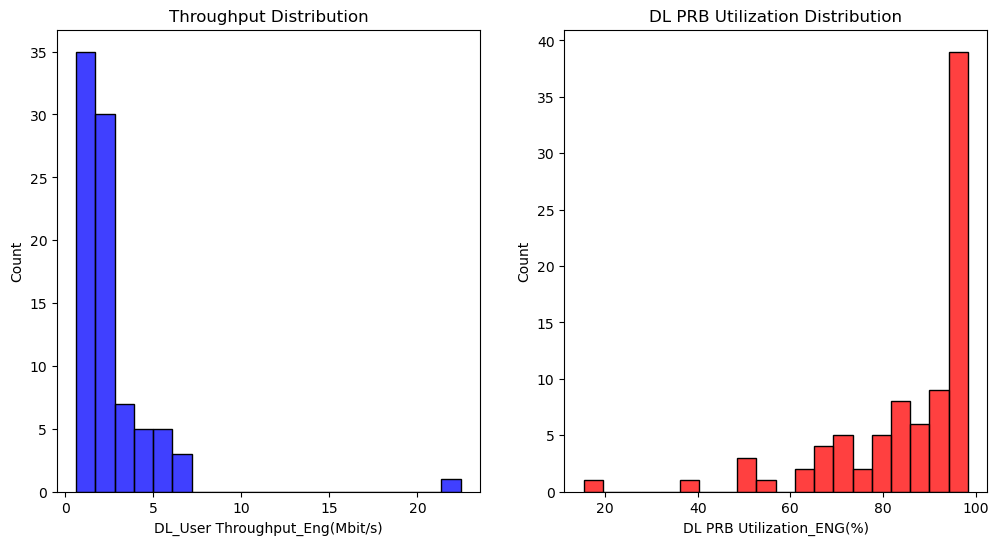

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the current working directory
# print("Current Working Directory:", os.getcwd())

# Change the working directory to 'my_project' on the Desktop
os.chdir('C:/Users/User/Desktop/Big data')

# Verify the change
# print("New Working Directory:", os.getcwd())


# Load 4G performance data
performance_data = pd.read_excel('C:/Users/User/Desktop/Big data/4G_perfromance_data_atCBH.xlsx')

# Load geolocation data
geolocation_data = pd.read_excel('C:/Users/User/Desktop/Big data/geo_location_data.xlsx')

# Display the first few rows of each dataset
# print(performance_data.head())
# print(geolocation_data.head())
# Check for missing values in performance data
# print(performance_data.isnull().sum())

# Fill missing values with the median or mean as appropriate
#performance_data.fillna(performance_data.median(), inplace=True)

# Normalize geolocation data (e.g., converting coordinates to a standard format)
geolocation_data['Latitude'] = geolocation_data['Latitude'].apply(lambda x: float(x))
geolocation_data['Longitue'] = geolocation_data['Longitue'].apply(lambda x: float(x))

# Display summary statistics to verify preprocessing
# print(performance_data.describe())
# print(geolocation_data.describe())

# Aggregate network performance data by site
aggregated_performance = performance_data.groupby('Site_ID').agg({
    'RRC Connected User_Opt2': 'mean',
    'DL PRB Utilization_ENG(%)': 'mean',
    'DL_User Throughput_Eng(Mbit/s)': 'mean',
    '4G RRC Rejection_ SOC': 'mean',
    'RO.RAB Failures': 'mean',
}).reset_index()

# Merge the aggregated performance data with geolocation data
merged_data = pd.merge(aggregated_performance, geolocation_data, on='Site_ID')

# Calculate additional metrics if needed
#merged_data['efficiency'] = merged_data['throughput'] / merged_data['latency']

# Display the merged dataset
# print(merged_data.head())



# Define criteria for optimal site selection (e.g., high throughput high rejection and high utlization)
criteria = (
    (merged_data['DL_User Throughput_Eng(Mbit/s)'] < 3) &  # First criterion: DL User Throughput less than the 3mbps
    (merged_data['DL PRB Utilization_ENG(%)'] > 70) &  # Second criterion: UL User Throughput greater than the 70%
    (merged_data['RRC Connected User_Opt2'] > 500) &    # third crtria is connected users greater than 500                         
    (merged_data['4G RRC Rejection_ SOC'] > 100) & 
    (merged_data['RO.RAB Failures'] > 100)
     )
optimal_sites = merged_data[criteria]

# Display the optimal sites
print("Optimal sites for 5G deployment:")
print(optimal_sites)

# vissualtion 


# Plot site locations and performance metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Longitue', y='Latitude', hue='DL PRB Utilization_ENG(%)', size='DL_User Throughput_Eng(Mbit/s)', palette='viridis')
plt.title('Geolocation and Performance of Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='DL_User Throughput_Eng(Mbit/s)')
plt.show()

# Plot histogram of throughput 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['DL_User Throughput_Eng(Mbit/s)'], bins=20, color='blue')
plt.title('Throughput Distribution')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['DL PRB Utilization_ENG(%)'], bins=20, color='red')
plt.title('DL PRB Utilization Distribution')
plt.show()

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# 1. Map Visualization for Site Locations
fig_map = px.scatter_geo(
    geolocation_data,
    lat='Latitude',   
    lon='Longitue',  
    hover_name='Site_ID',  
    size='Latitude',  
    title='Site Locations'
)
fig_map.show()

# 2. Bar Chart for DL User Throughput
fig_bar = px.bar(
    performance_data,
    x='Site_ID',  # Replace with actual column for x-axis
    y='DL_User Throughput_Eng(Mbit/s)',  # Replace with the actual column name
    title='Downlink User Throughput per Site',
    labels={'DL_User Throughput_Eng(Mbit/s)': 'DL Throughput (Mbit/s)'}
)
fig_bar.show()

# 3. Line Chart for Latency Over Time
fig_bar = px.bar(
    performance_data,
    x='DL PRB Utilization_ENG(%)',  # Replace with the actual timestamp or date column
    y='DL_User Throughput_Eng(Mbit/s)',  # Replace with the actual latency column name
    title='DL Throughput Over utlization',
    labels={'DL_User Throughput_Eng(Mbit/s)': 'DL Throughput (Mbit/s)'}
)
fig_bar.show()

# 4. Heatmap for Correlation Between Metrics
import numpy as np

#import plotly.graph_objects as go

# .

# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=['number'])

# Drop columns with zero variance 
numeric_data = numeric_data.loc[:, numeric_data.var() != 0]

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

fig_heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis'
))

fig_heatmap.show()